# Railway Track Fault Detector

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, BatchNormalization, Dropout, RandomFlip, RandomContrast, RandomRotation, RandomCrop
from keras.callbacks import EarlyStopping
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import os

In [2]:
# Directories for the test, train and validation dataset:

train_dir = r"C:\Users\91909\Desktop\LOOP Mentorship\Railway_Fault_Track_Detection_Data\Railway Track fault Detection Updated\Train"
test_dir = r"C:\Users\91909\Desktop\LOOP Mentorship\Railway_Fault_Track_Detection_Data\Railway Track fault Detection Updated\Test"
validation_dir = r"C:\Users\91909\Desktop\LOOP Mentorship\Railway_Fault_Track_Detection_Data\Railway Track fault Detection Updated\Validation"

### Augmenting the data using ImageDataGenerator. All necessary modifiers have been applied.

In [3]:
augmentor_train = ImageDataGenerator(
        rescale=1.0/255,
        rotation_range=90,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode="nearest")

augmentor_test = ImageDataGenerator(
        rescale=1.0/255)

In [4]:
train_aug = augmentor_train.flow_from_directory(
        train_dir,
        target_size=(200, 200),
        batch_size=32,
        shuffle=True,
        class_mode="binary")

test_aug = augmentor_test.flow_from_directory(
        test_dir,
        target_size=(200, 200),
        batch_size=32,
        class_mode="binary")

validation_aug = augmentor_test.flow_from_directory(
        validation_dir,
        target_size=(200, 200),
        batch_size=32,
        class_mode="binary")

Found 299 images belonging to 2 classes.
Found 22 images belonging to 2 classes.
Found 62 images belonging to 2 classes.


### Model architecture:

In [5]:
model = Sequential()

# model.add(RandomFlip(mode="horizontal"))
# model.add(RandomFlip(mode="vertical"))
# model.add(RandomContrast(factor=0.2))
# model.add(RandomRotation(factor=0.25))
# model.add(RandomCrop(height=500, width=500))

model.add(BatchNormalization(renorm=True))

model.add(BatchNormalization(renorm=True))
model.add(Conv2D(8, kernel_size=(3, 3),
                 padding="valid",
                 activation="relu"))
model.add(MaxPooling2D())

model.add(BatchNormalization(renorm=True))
model.add(Conv2D(16, kernel_size=(3, 3),
                 padding="valid",
                 activation="relu"))
model.add(MaxPooling2D())

model.add(BatchNormalization(renorm=True))
model.add(Conv2D(32, kernel_size=(3, 3),
                 padding="valid",
                 activation="relu"))
model.add(MaxPooling2D())

model.add(BatchNormalization(renorm=True))
model.add(Conv2D(64, kernel_size=(3, 3),
                 padding="valid",
                 activation="relu"))
model.add(MaxPooling2D())

model.add(BatchNormalization(renorm=True))
model.add(Conv2D(128, kernel_size=(3, 3),
                 padding="valid",
                 activation="relu"))
model.add(MaxPooling2D())

model.add(BatchNormalization(renorm=True))
model.add(Conv2D(256, kernel_size=(3, 3),
                 padding="valid",
                 activation="relu"))
model.add(MaxPooling2D())


model.add(BatchNormalization(renorm=True))
model.add(Flatten())

model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

# model.add(MaxPooling2D(pool_size=(2, 2),
#                        strides=2,
#                        padding="valid"))

In [6]:
train_aug.image_shape

(200, 200, 3)

In [7]:
input_shape = (None, 200, 200, 3)

In [8]:
model.build(input_shape=input_shape)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 200, 200, 3)      21        
 ormalization)                                                   
                                                                 
 batch_normalization_1 (Batc  (None, 200, 200, 3)      21        
 hNormalization)                                                 
                                                                 
 conv2d (Conv2D)             (None, 198, 198, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 8)        0         
 )                                                               
                                                                 
 batch_normalization_2 (Batc  (None, 99, 99, 8)        56        
 hNormalization)                                        

### Defining Early Stopping

In [10]:
early_stopping = EarlyStopping(
        monitor='val_loss',
        min_delta=0.005,
        patience=5,
        restore_best_weights=True
)

### Compiling the model

In [11]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [12]:
history = model.fit(train_aug,
                    epochs=20,
                    validation_data=validation_aug,
                    callbacks=[early_stopping])

Epoch 1/20
10/10 [==============================] - 36s 3s/step - loss: 0.6919 - accuracy: 0.5385 - val_loss: 0.6923 - val_accuracy: 0.5000
Epoch 2/20
10/10 [==============================] - 36s 4s/step - loss: 0.7009 - accuracy: 0.5351 - val_loss: 0.6773 - val_accuracy: 0.6452
Epoch 3/20
10/10 [==============================] - 43s 4s/step - loss: 0.6820 - accuracy: 0.5886 - val_loss: 0.6467 - val_accuracy: 0.6774
Epoch 4/20
10/10 [==============================] - 42s 4s/step - loss: 0.6717 - accuracy: 0.5853 - val_loss: 0.7043 - val_accuracy: 0.5000
Epoch 5/20
10/10 [==============================] - 41s 4s/step - loss: 0.7240 - accuracy: 0.6087 - val_loss: 0.6385 - val_accuracy: 0.6613
Epoch 6/20
10/10 [==============================] - 42s 4s/step - loss: 0.7732 - accuracy: 0.6187 - val_loss: 0.6069 - val_accuracy: 0.6935
Epoch 7/20
10/10 [==============================] - 41s 4s/step - loss: 0.8420 - accuracy: 0.6187 - val_loss: 0.7025 - val_accuracy: 0.5645
Epoch 8/20
10/10 [==

### Plotting the graphs of Accuracy and Loss of train and validation datasets over the epochs.

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [14]:
def printplot(history):
        print("GRAPHS-----------------------")
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history["accuracy"], color="red", label="train")
        plt.plot(history.history["val_accuracy"], color="blue", label="validation")
        plt.title("Graph of accuracy over epochs")
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history["loss"], color="red", label="train")
        plt.plot(history.history["val_loss"], color="blue", label="validation")
        plt.title("Graph of loss over epochs")
        plt.legend()

GRAPHS-----------------------


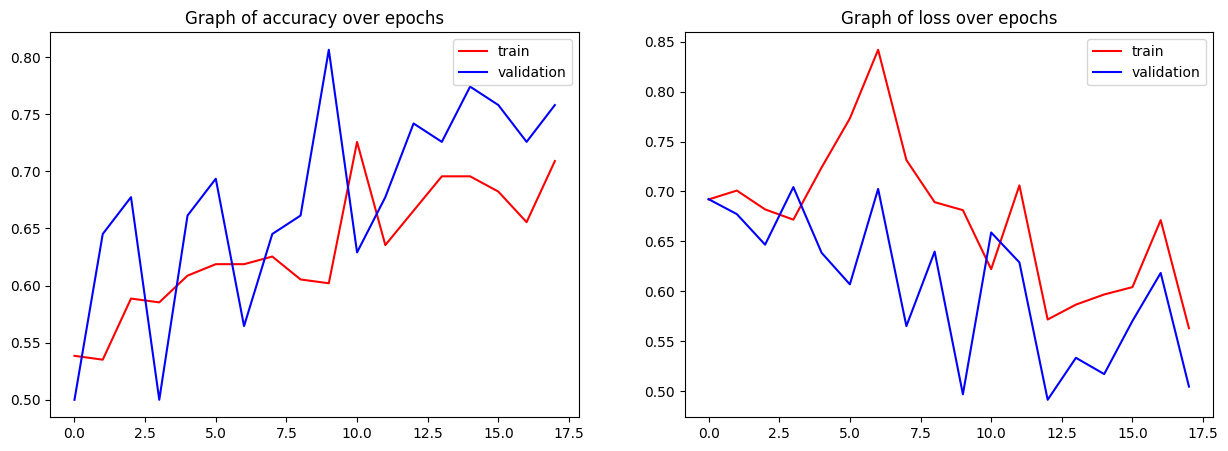

In [15]:
printplot(history)

### Making predictions from the model.

In [16]:
y_pred = model.predict(test_aug, steps=len(test_aug))
y_pred = np.round(y_pred).astype(int).flatten()
y_true = test_aug.classes

1/1 [==============================] - 4s 4s/step


In [17]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [18]:
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### Plotting the Confusion Matrix and Classification Report.

CLASSIFICATION REPORT----------------------------
               precision    recall  f1-score   support

    Defective       0.54      0.64      0.58        11
Non defective       0.56      0.45      0.50        11

     accuracy                           0.55        22
    macro avg       0.55      0.55      0.54        22
 weighted avg       0.55      0.55      0.54        22



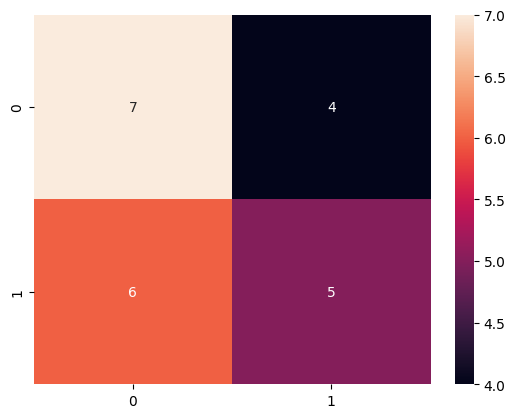

In [19]:
conf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(conf_matrix, annot=True)

print("CLASSIFICATION REPORT----------------------------")
target_names = list(test_aug.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=target_names))